<a href="https://colab.research.google.com/github/ncminhbka/ML-Projects/blob/main/GA_One_Max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

quy trình cơ bản của giải thuật di truyền: khởi tạo quần thể ban đầu, đánh
giá độ thích nghi bằng hàm f(x), sau đó chọn lọc để hình thành nhóm cha–mẹ. Từ nhóm này,
ta thực hiện lai ghép (crossover) và đột biến (mutation) để tạo thế hệ con, đồng thời có thể giữ
lại một số cá thể ưu tú (elitism). Vòng lặp tiếp tục qua nhiều thế hệ cho đến khi thoả điều kiện
dừng (đủ số thế hệ, đạt ngưỡng fitness, hoặc không còn cải thiện).

In [ ]:
import random
import matplotlib.pyplot as plt

SEED = 42
POP_SIZE = 50
CHROM_LENGTH = 40
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.9
TOURNAMENT_SIZE = 3
GENERATIONS = 100

random.seed(SEED)

In [ ]:
random.randint(0, 1) #randint(a, b) lấy khoảng [a, b]

1

In [ ]:
def random_chromosome(length):
    return [random.randint(0,1) for _ in range(length)]

In [ ]:
r = random_chromosome(10)
r

[0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

In [ ]:
def fitness(chrom):
    return sum(chrom)

In [ ]:
fitness(r)

4

In [ ]:
population = []
for _ in range(POP_SIZE):
    chrom = random_chromosome(CHROM_LENGTH)
    population.append({'chrom': chrom, 'fitness': fitness(chrom)})


In [ ]:
type(population[0])

dict

In [ ]:
def tournament_selection(pop, k=TOURNAMENT_SIZE): #pop là 1 list chứa các dict
    candidates = random.sample(pop, k)
    best = max(candidates, key=lambda ind: ind['fitness']) #key nhận 1 hàm làm tiêu chí so sánh, ở đây là hàm lambda nhận dict ind trả về key fitness của nó
    return best['chrom'][:] #trả về bản sao

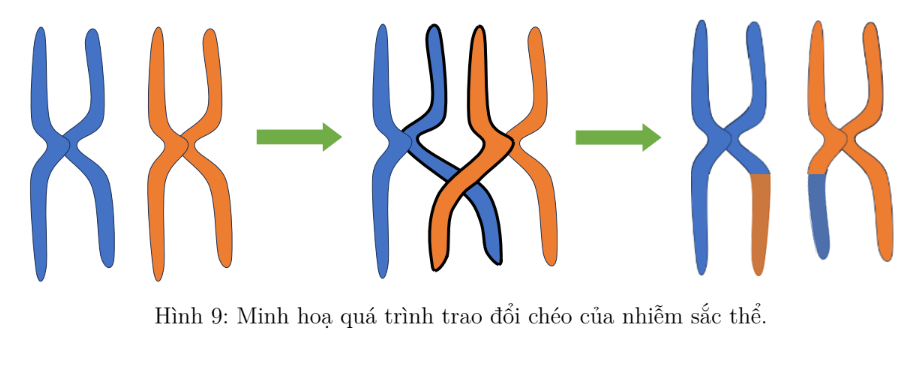

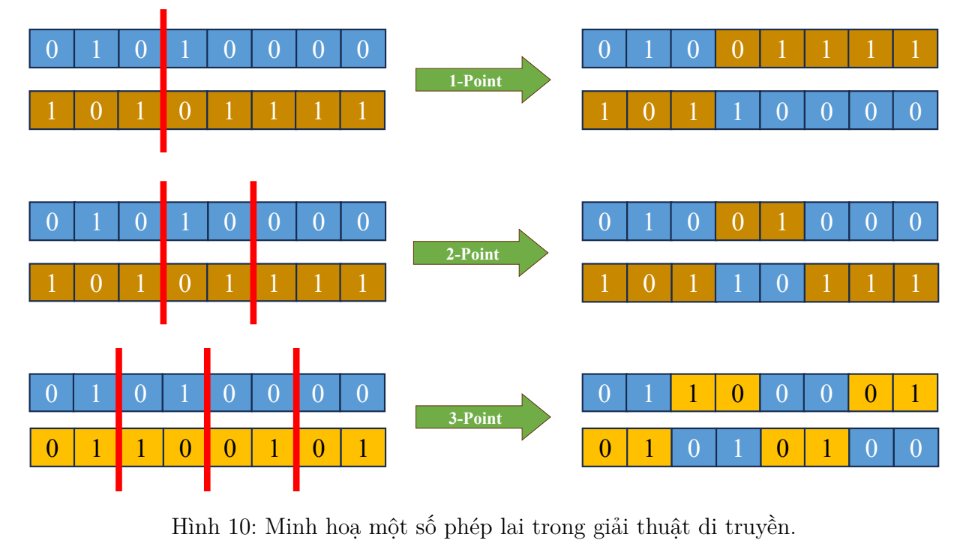

In [ ]:
def single_point_crossover(p1, p2):
    '''
    lai ghép các cá thể vượt trột
    '''
    if random.random() > CROSSOVER_RATE:
        return p1[:], p2[:] #không phải lúc nào cũng lai, có thể giữ (exploitation)
    point = random.randint(1, len(p1)-1) #điểm cắt không thể là 2 đầu
    c1 = p1[:point] + p2[point:]
    c2 = p2[:point] + p1[point:]
    return c1, c2 #exploration

In [ ]:
def mutate(chrom):
    '''
    duyệt từng vị trí gen, chọn ngẫu nhiên một số vị trí để đột biến
    '''
    for i in range(len(chrom)):
        if random.random() < MUTATION_RATE:
            chrom[i] = 1 - chrom[i]
    return chrom

In [ ]:
best_history = []
avg_history = []

for gen in range(GENERATIONS):
    pop_sorted = sorted(population, key=lambda ind: ind['fitness'], reverse=True) #sort theo finess giảm
    best = pop_sorted[0] #cá thể có fitness tốt nhất
    avg = sum(ind['fitness'] for ind in population) / POP_SIZE #trung bình độ tốt của quần thể
    best_history.append(best['fitness']) #ghi nhận
    avg_history.append(avg) #ghi nhận
    if gen % 10 == 0 or gen == GENERATIONS-1:
        print(f"Gen {gen:3d}  Best fitness = {best['fitness']:2d}  Avg fitness = {avg:5.2f}")
    if best['fitness'] == CHROM_LENGTH:
        print(f"Reached optimal solution at generation {gen}.") #ĐẠT TỐI ƯU
        break
    next_pop = [{'chrom': best['chrom'][:], 'fitness': best['fitness']}] #cá thế tốt nhất đc giữ lại (elitism), có thể lấy nhiều hơn
    while len(next_pop) < POP_SIZE:
        parent1 = tournament_selection(pop_sorted)
        parent2 = tournament_selection(pop_sorted)
        child1_chrom, child2_chrom = single_point_crossover(parent1, parent2)
        child1 = mutate(child1_chrom)
        child2 = mutate(child2_chrom)
        next_pop.append({'chrom': child1, 'fitness': fitness(child1)})
        if len(next_pop) < POP_SIZE:
            next_pop.append({'chrom': child2, 'fitness': fitness(child2)})
    population = next_pop

final_pop_sorted = sorted(population, key=lambda ind: ind['fitness'], reverse=True)
final_best = final_pop_sorted[0]
print("\nFinal best individual:")
print("Chromosome:", "".join(map(str, final_best['chrom'])))
print("Fitness   :", final_best['fitness'], f"/ {CHROM_LENGTH}")


Gen   0  Best fitness = 40  Avg fitness = 38.38
Reached optimal solution at generation 0.

Final best individual:
Chromosome: 1111111111111111111111111111111111111111
Fitness   : 40 / 40


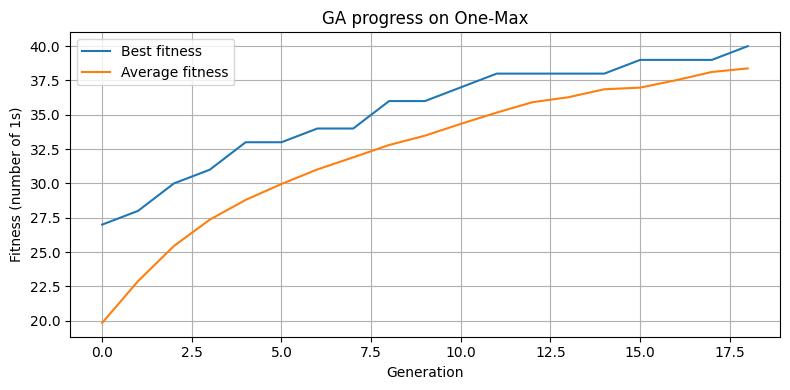

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(best_history, label='Best fitness')
plt.plot(avg_history, label='Average fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness (number of 1s)')
plt.title('GA progress on One-Max')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1️⃣ Khởi tạo quần thể (Initialization)

Tạo một quần thể ban đầu gồm N cá thể (chromosome) ngẫu nhiên.

Mỗi cá thể thường là một danh sách các gene (0/1, số thực, ký tự… tùy bài toán).

Ví dụ OneMax: [0,1,1,0,1,0].

2️⃣ Tính fitness (Evaluation)

Tính giá trị fitness cho mỗi cá thể.

Fitness đo mức “tốt” của giải pháp, dùng để chọn lọc.

Ví dụ OneMax: fitness = số lượng 1 trong chromosome.

3️⃣ Chọn lọc (Selection)

Chọn cá thể làm bố mẹ cho thế hệ tiếp theo.

Các phương pháp phổ biến:

Tournament selection: chọn k cá thể ngẫu nhiên → chọn cá thể tốt nhất.

Roulette wheel: chọn ngẫu nhiên theo xác suất tỷ lệ fitness.

Mục tiêu: cá thể tốt có khả năng sinh sản cao hơn.

4️⃣ Lai ghép (Crossover)

Tạo cá thể con bằng cách trao đổi gene giữa 2 bố mẹ.

Các phương pháp:

Single-point crossover: chọn 1 điểm cắt → tráo gene sau điểm đó.

Multi-point crossover: nhiều điểm cắt.

Xác suất crossover (CROSSOVER_RATE) quyết định có thực hiện hay không.

5️⃣ Đột biến (Mutation)

Thay đổi ngẫu nhiên một hoặc vài gene của cá thể con.

Giữ cho quần thể đa dạng gene, tránh hội tụ sớm.

Xác suất mutation (MUTATION_RATE) thường thấp (0.01–0.1).

6️⃣ Elitism (Bảo tồn cá thể tốt nhất)

Giữ lại 1 hoặc nhiều cá thể tốt nhất sang thế hệ mới mà không thay đổi.

Đảm bảo không mất giải pháp tốt trong quá trình tiến hóa.

7️⃣ Tạo thế hệ mới (Replacement)

Thế hệ mới gồm:

Cá thể tốt nhất (elitism)

Cá thể con được sinh ra từ selection → crossover → mutation

Quay lại bước 2 cho thế hệ tiếp theo.

8️⃣ Kiểm tra điều kiện dừng (Termination)

Dừng khi:

Đạt số thế hệ tối đa (GENERATION).

Fitness tốt nhất đạt giải pháp tối ưu.

Hoặc hội tụ, không cải thiện fitness qua nhiều thế hệ.